**Задания для самостоятельного выполнения**

1)Выведите результаты работы библиотечной модели - в численном и в графическом виде.

Точность модели: 0.97
Матрица ошибок:
[[ 92   3]
 [  2 103]]


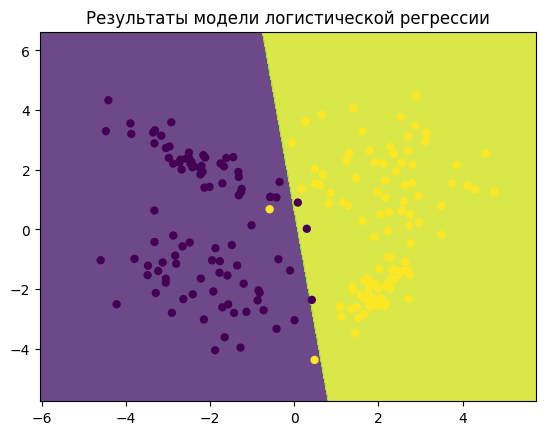

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Делаем прогноз на тестовых данных
y_pred = model.predict(X_test)

# Вывод численных результатов
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Точность модели: {accuracy:.2f}')
print('Матрица ошибок:')
print(confusion)

# Строим график данных и разделяющей гиперплоскости
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=25)
plt.title('Результаты модели логистической регрессии')
plt.show()


2)Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

Скорость обучения 0.01: Точность модели = 0.97
Скорость обучения 0.1: Точность модели = 0.97
Скорость обучения 0.5: Точность модели = 0.97
Скорость обучения 1: Точность модели = 0.97
Скорость обучения 2: Точность модели = 0.97
Скорость обучения 5: Точность модели = 0.97
Скорость обучения 10: Точность модели = 0.98


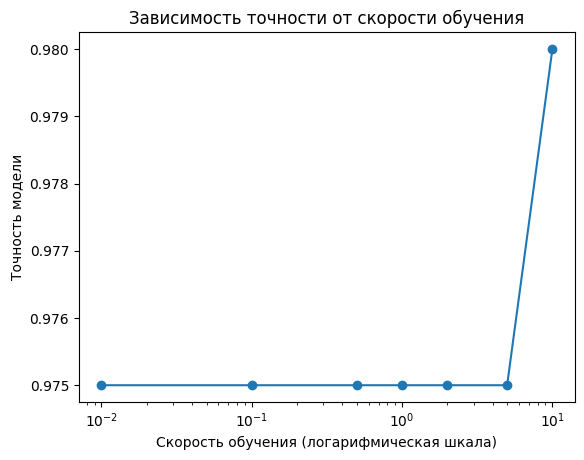

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


In [41]:
# Список значений скорости обучения для тестирования
learning_rates = [0.01, 0.1, 0.5, 1, 2, 5, 10]

# Словарь для хранения результатов
results = {}

for lr in learning_rates:
    model = LogisticRegression(solver='sag', max_iter=10000, C=1/lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[lr] = accuracy

# Вывод результатов
for lr, accuracy in results.items():
    print(f'Скорость обучения {lr}: Точность модели = {accuracy:.2f}')

# Визуализация результатов
plt.figure()
plt.plot(learning_rates, [results[lr] for lr in learning_rates], marker='o')
plt.xscale('log')
plt.xlabel('Скорость обучения (логарифмическая шкала)')
plt.ylabel('Точность модели')
plt.title('Зависимость точности от скорости обучения')
plt.show()
pd.DataFrame(X).head()

3)Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

Скорость обучения 0.01: Точность модели = 0.97
Скорость обучения 0.1: Точность модели = 0.97
Скорость обучения 0.5: Точность модели = 0.97
Скорость обучения 1: Точность модели = 0.97
Скорость обучения 2: Точность модели = 0.97
Скорость обучения 5: Точность модели = 0.97
Скорость обучения 10: Точность модели = 0.98


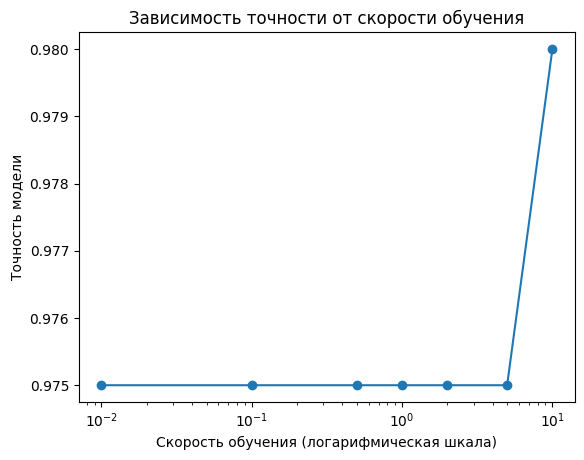

,0,1,2,3
0,1.0,1.0,1.863411,0.087646
1,1.0,1.0,-1.530997,1.901182
2,1.0,1.0,-0.017224,-2.591112
3,1.0,1.0,-2.032039,-1.801162
4,1.0,1.0,4.620555,0.901124


In [43]:
# Добавляем фиктивный столбец единиц к матрице признаков
X = np.hstack((np.ones((X.shape[0], 1)), X))

# # Список значений скорости обучения для тестирования
learning_rates = [0.01, 0.1, 0.5, 1, 2, 5, 10]

# Словарь для хранения результатов
results = {}

for lr in learning_rates:
    model = LogisticRegression(solver='sag', max_iter=10000, C=1/lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[lr] = accuracy

# Вывод результатов
for lr, accuracy in results.items():
    print(f'Скорость обучения {lr}: Точность модели = {accuracy:.2f}')

# Визуализация результатов
plt.figure()
plt.plot(learning_rates, [results[lr] for lr in learning_rates], marker='o')
plt.xscale('log')
plt.xlabel('Скорость обучения (логарифмическая шкала)')
plt.ylabel('Точность модели')
plt.title('Зависимость точности от скорости обучения')
plt.show()
pd.DataFrame(X).head()

4)Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

Точность модели: 0.85
Матрица ошибок:
[[80 15]
 [14 91]]


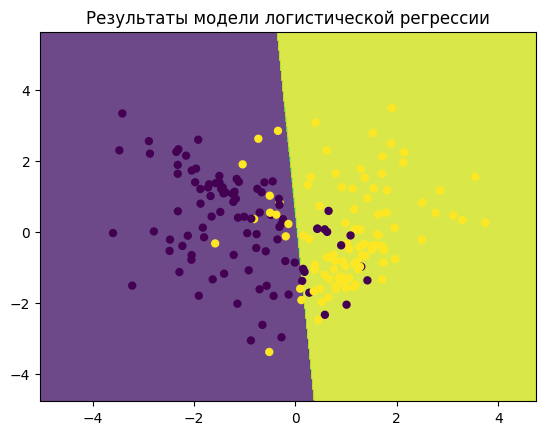

Точность модели: 0.97
Матрица ошибок:
[[ 92   3]
 [  2 103]]


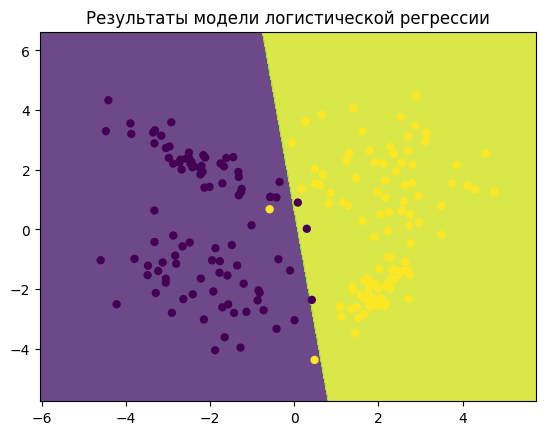

Точность модели: 1.00
Матрица ошибок:
[[ 95   0]
 [  0 105]]


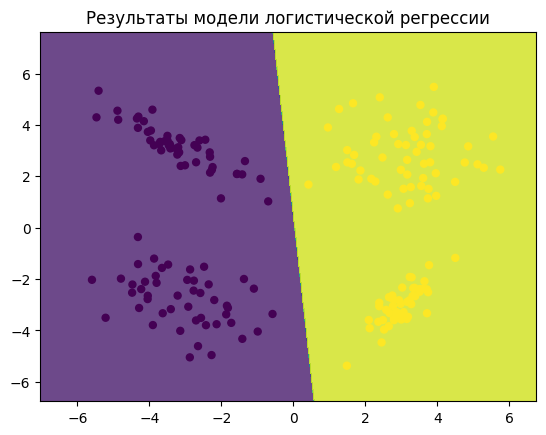

Точность модели: 1.00
Матрица ошибок:
[[ 95   0]
 [  0 105]]


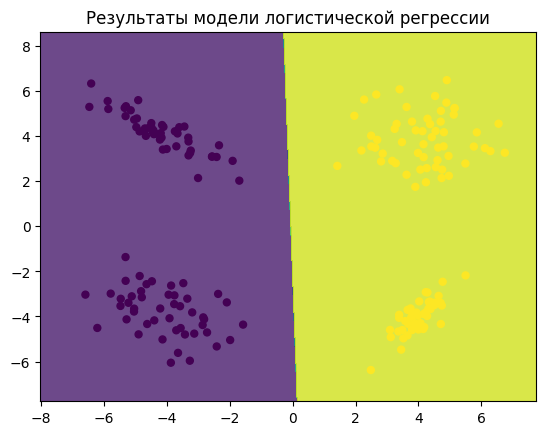

Точность модели: 1.00
Матрица ошибок:
[[ 95   0]
 [  0 105]]


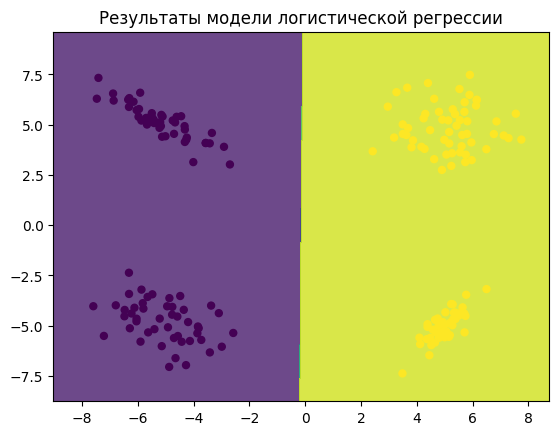

In [44]:
for c_s in range(1,6):
  X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=c_s,
                            random_state=1)

  # Разделяем данные на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Обучаем модель логистической регрессии
  model = LogisticRegression()
  model.fit(X_train, y_train)

  # Делаем прогноз на тестовых данных
  y_pred = model.predict(X_test)

  # Вывод численных результатов
  accuracy = accuracy_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  print(f'Точность модели: {accuracy:.2f}')
  print('Матрица ошибок:')
  print(confusion)

  # Строим график данных и разделяющей гиперплоскости
  xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                      np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=25)
  plt.title('Результаты модели логистической регрессии')
  plt.show()

5)Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [45]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha*b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * np.dot(X.T, self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

logreg = LogReg()


# Создание датасета с большим числом признаков
X, y = make_classification(
    n_samples=1000,
    n_features=100,  # Установите желаемое количество признаков
    n_informative=100,  # Чтобы убедиться, что все признаки информативны
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
logreg = LogReg()
logreg.fit(X_train, y_train)

# Прогноз на тестовых данных
y_pred = logreg.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.93


6)Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [46]:
# Генерируем датасет с 5 классами
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_classes=5,
    random_state=1
)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель "один против всех" с помощью логистической регрессии
models = []
for class_label in range(5):
    # Создаем отдельную модель для класса
    model = LogisticRegression(solver='lbfgs')

    # Бинарные метки: 1 для текущего класса, 0 для остальных классов
    binary_labels = (y_train == class_label).astype(int)

    # Обучаем модель для текущего класса
    model.fit(X_train, binary_labels)

    models.append(model)

# Делаем прогноз на тестовых данных для каждой модели
y_pred = np.array([model.predict(X_test) for model in models]).T

# Выбираем класс с максимальной уверенностью
predicted_classes = np.argmax(y_pred, axis=1)

# Оцениваем производительность модели
accuracy = np.mean(predicted_classes == y_test)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.34


7)Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [47]:
# Генерируем датасет
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_classes=5,
    random_state=1
)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='ovr')  # 'ovr' означает "один против всех"

model.fit(X_train, y_train)

# Получаем вероятности принадлежности каждого объекта к разным классам
y_probabilities = model.predict_proba(X_test)

# Выводим вероятности для первых пяти объектов
print("Вероятности для первых пяти объектов:")
print(y_probabilities[:5])

Вероятности для первых пяти объектов:
[[0.10724327 0.26902639 0.08405435 0.52228846 0.01738754]
 [0.17344199 0.22280374 0.01098868 0.10890257 0.48386302]
 [0.02359144 0.07733586 0.04046081 0.15265741 0.70595448]
 [0.04650396 0.08524237 0.06601089 0.21388366 0.58835911]
 [0.11402733 0.58865305 0.00743634 0.19943763 0.09044565]]
